<a href="https://colab.research.google.com/github/dcreeder89/Food_Sales_Predictions/blob/main/1_Reeder_Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food Sales Predictions
- Christina Reeder
- Updated: 30 Nov 2022

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ignore warnings when displaying plots
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [4]:
# Save file path as a variable
filename = '/content/drive/MyDrive/Coding Dojo/Projects/Project 1/sales_predictions.csv'
# Save data in file as a new dataframe
sales_df = pd.read_csv(filename)

In [5]:
# Look at summary of DataFrame's columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Preview first 5 rows of data
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

### 1. How many rows and columns?

In [7]:
# Look at the shape of the sales DataFrame to determine number of rows and coumns
sales_df.shape

(8523, 12)

> This DataFrame has 8523 rows, and 12 columns

### 2. What are the datatypes of each variable?

In [8]:
# Examine datatypes of each column
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3. Are there duplicates? If so, drop any duplicates.

In [9]:
# Check sum of the number of duplicate rows in the dataframe
sales_df.duplicated().sum()

0

> There are no duplicated rows in the dataframe 

### 4. Identify missing values

In [10]:
# Check sum of any data that is NaN
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> Item_ Weight has 1463 missing values, and Outlet_Size has 2410 missing values out of the total 8523 rows of data in this DataFrame.

### 5. Decide on how to address missing values and do it.

#### Item_Weight Missing Values

In [11]:
sales_df.sort_values(by='Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


> NaNs in the item weight column are randomly missing, but the same items are in different stores, so we can fix the missing values using the known values from other stores.

In [12]:
# Create a series of all the item weights sorted by the item identifiers
item_weights = sales_df.groupby('Item_Identifier')['Item_Weight'].max()

In [13]:
# convert item_weights to a dictionary
item_weights.to_dict();

In [14]:
for key, cost in item_weights.items():
  # Create filter for the key so that we can change the values in the dataframe
  key_filter = sales_df['Item_Identifier'] == key

  # Change the values in the dataframe that are nan with the actual values of the item weights
  sales_df.loc[key_filter, 'Item_Weight'] = cost

In [15]:
# Check number of NaN values in Item_Weight column
sales_df['Item_Weight'].isna().sum()

4

In [16]:
# Check number of NaN values in the item_weights dictionary from above to see if it matches
item_weights.isna().sum()

4

In [17]:
# Determine which items still have no weight by sorting dataframe
sales_df.sort_values(by='Item_Weight').tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2368,FDC02,21.35,Low Fat,0.068809,Canned,258.5278,OUT035,2004,Small,Tier 2,Supermarket Type1,5206.5560
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [18]:
# Check 4 items with weight = NaN
sales_df[sales_df['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [19]:
sales_df[sales_df['Item_Identifier']=='FDK57']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [20]:
sales_df[sales_df['Item_Identifier']=='FDE52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046


In [21]:
sales_df[sales_df['Item_Identifier']=='FDQ60']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


> The four items left in our dataframe with NaN vlaues in the Item_Weight column are the only items with these specific Item_Identifier. Therefore, I am going to drop these four rows from our database since I have no good way to predict the Item Weight for these items.

In [22]:
# Drop rows with NaN in the Item_Weight column
sales_df.dropna(subset=['Item_Weight'], inplace=True)

#### Outlet_Size Missing Values

In [23]:
# Check sum of Outlet_Size strings when grouped by Outlet_Identifier and Outlet_Type
sales_df.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].sum()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store                                                        0
OUT013             Supermarket Type1    HighHighHighHighHighHighHighHighHighHighHighHi...
OUT017             Supermarket Type1                                                    0
OUT018             Supermarket Type2    MediumMediumMediumMediumMediumMediumMediumMedi...
OUT019             Grocery Store        SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
OUT027             Supermarket Type3    MediumMediumMediumMediumMediumMediumMediumMedi...
OUT035             Supermarket Type1    SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
OUT045             Supermarket Type1                                                    0
OUT046             Supermarket Type1    SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
OUT049             Supermarket Type1    MediumMediumMediumMediumMediumMediumMediumMedi...
Name: Outlet_Size, dtype: object

> OUT010 is Type Grocery Store: the only other outlet with type grocery store is a size 'Small', so we will change the size of all produce in OUT010 to 'Outlet_Size' = 'Small'

> OUT017 and OUT045 are both Supermarket Type1. The other Supermarket Type1 outlets are of the following sizes: Small x 2, Medium x 1, Large x 1. I will look at a couple other datapoints to determine how to proceed with these

##### Supermarket Type1 Deep Dive

In [24]:
# Make a filter to only look at 'Supermarket Type1' Outlets
st1_filter = sales_df['Outlet_Type'] == 'Supermarket Type1'
# Create Supermarket Type1 exclusive dataframe to look at
st1_df = sales_df[st1_filter]

In [25]:
# Look at Outlet_Location_Type and Outlet_Identifier vs. size for all Supermarket Type1 in new dataframe
st1_df.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Outlet_Size'].sum()

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT046               SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
                      OUT049               MediumMediumMediumMediumMediumMediumMediumMedi...
Tier 2                OUT017                                                               0
                      OUT035               SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
                      OUT045                                                               0
Tier 3                OUT013               HighHighHighHighHighHighHighHighHighHighHighHi...
Name: Outlet_Size, dtype: object

> The only other Tier 2 Supermarket Type1 is size 'Small'. Therefore, I am going to make the educated guess that OUT017 and OUT045 are both 'Small' size, as they are also Tier 2 Location Types

##### Change OUT017 and OUT045 to 'Outlet_Size' of 'Small' in accordance to deep dive above

In [26]:
# Create filter in main dataframe for Outlet_Identifiers of OUT017 and OUT045
OUT017_filter = sales_df['Outlet_Identifier'] == 'OUT017' 
OUT045_filter = sales_df['Outlet_Identifier'] == 'OUT045'

# Change 'Outlet_Size' of all produce in OUT017 and OUT045 to 'Small'
sales_df.loc[OUT017_filter, 'Outlet_Size'] = 'Small'
sales_df.loc[OUT045_filter, 'Outlet_Size'] = 'Small'

# Check that the sizes of the outlets have changed
sales_df.loc[OUT017_filter].head()
sales_df.loc[OUT045_filter].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Small,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,Small,Tier 2,Supermarket Type1,2117.2440


##### Changing OUT010

In [27]:
# Change 'Outlet_Size' of all produce in OUT010 to 'Small'
OUT010_filter = sales_df['Outlet_Identifier'] == 'OUT010'
sales_df.loc[OUT010_filter, 'Outlet_Size'] = 'Small'
# Check that the size for OUT010 has changed
sales_df.loc[OUT010_filter].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,Small,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Small,Tier 3,Grocery Store,184.4266


In [28]:
# Check new sum of missing values in Outlet_Size column
sales_df['Outlet_Size'].isna().sum()

0

### 6. Confirm that there are no missing values after addressing them

In [29]:
# Check the sum of the missing values in each column to check that all have been addressed
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7. Find and fix any inconsistent categories of data.

> Columns that should have a specific number of options are:
- Item_Fat_Content
- Item_Type
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type
>
> I will check theses columns for inconsistent categories

In [30]:
# Check name in the Item_Fat_Content column
sales_df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
dtype: int64

> The only two options in this column should be 'Low Fat' and 'Regular', I will have to fix the other naming conventions to fit with these two options

In [31]:
# Check names in the Item_Type column
sales_df.value_counts('Item_Type')

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
dtype: int64

> No names look inconsistent in this column

In [32]:
# Check names in the Outlet_Size column
sales_df.value_counts('Outlet_Size')

Outlet_Size
Small     4797
Medium    2790
High       932
dtype: int64

> No names look inconsistent in this column

In [33]:
# Check names in the Outlet_Location_Type column
sales_df.value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    3347
Tier 2    2785
Tier 1    2387
dtype: int64

> No names look inconsistent in this column

In [34]:
# Check names in the Outlet_Type column
sales_df.value_counts('Outlet_Type')

Outlet_Type
Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
dtype: int64

> No names look inconsistent in this column

#### Fix data in Item_Fat_Content column

In [35]:
# Change name 'LF' to 'Low Fat' in Item_Fat_Content column
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [36]:
# Change name 'reg' to 'Regular' in Item_Fat_Content column
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('reg', 'Regular')

In [37]:
# Change name 'low fat' to 'Low Fat' in Item_Fat_Content column
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [38]:
# Check names in the Item_Fat_Content column have been changed
sales_df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5516
Regular    3003
dtype: int64

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [39]:
# Use .describe() to obtain summary statistics of each numerical column
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

### Histogram to view distributions of various features in dataset

#### Item Outlet Sales Distribution

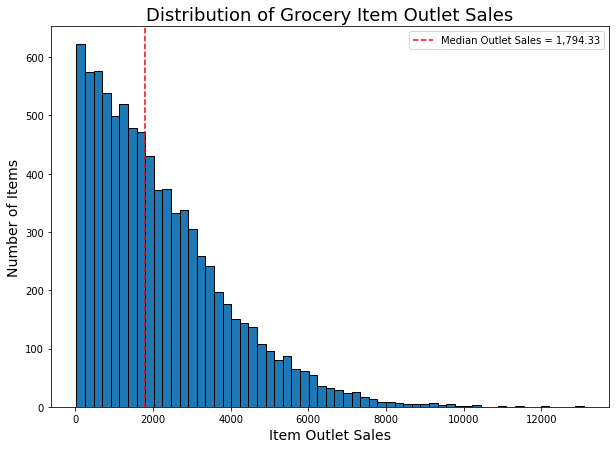

In [40]:
plt.figure(figsize = (10,7)) # Set figure size
# Plot histogram with auto bins for item outlet sales
plt.hist(sales_df['Item_Outlet_Sales'], bins = 'auto', edgecolor = 'black'); 
plt.xlabel('Item Outlet Sales', fontsize = 14);#label xaxis
plt.ylabel('Number of Items', fontsize = 14);#label yaxis
plt.title('Distribution of Grocery Item Outlet Sales', fontsize = 18);# histogram title

# Add vertical line for median value 
median = sales_df['Item_Outlet_Sales'].median()#determine median value
plt.axvline(median, color = 'red', linestyle = '--',
            label = f'Median Outlet Sales = {median:,.2f}')#display median as vertical line on plot
plt.legend();#display legend

> The majority of items in the outlets have low sales values. The number of items with high sales tapers off to below 100 items around the 5000 sales mark.

#### Item MRP Distribution

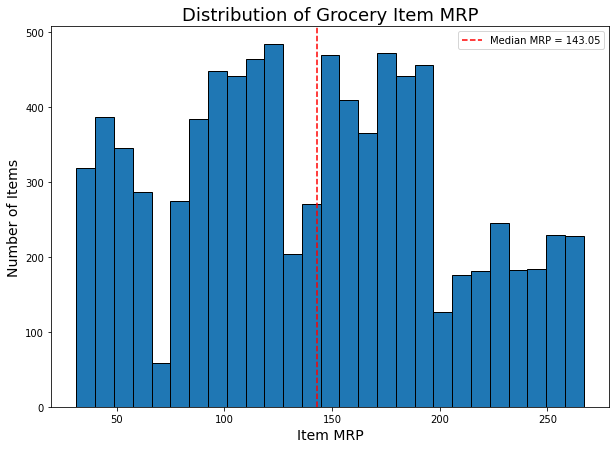

In [41]:
plt.figure(figsize = (10,7)) # Set figure size
# Plot histogram with auto bins for item outlet sales
plt.hist(sales_df['Item_MRP'], bins = 'auto', edgecolor = 'black'); 
plt.xlabel('Item MRP', fontsize = 14);#label xaxis
plt.ylabel('Number of Items', fontsize = 14);#label yaxis
plt.title('Distribution of Grocery Item MRP', fontsize = 18);# histogram title

# Add vertical line for median value 
median = sales_df['Item_MRP'].median()#determine median value
plt.axvline(median, color = 'red', linestyle = '--',
            label = f'Median MRP = {median:,.2f}')#display median as vertical line on plot
plt.legend();#display legend

> There is a fairly even distribution of Item MRPs. Most items with MRP below 200 have approximately the same number of items of 300 or more. Whereas, the Items with MRP above 200 have a count of around 200 or less. 

### Boxplot to view statistical summaries of various features in dataset

#### Item weights based on fat content

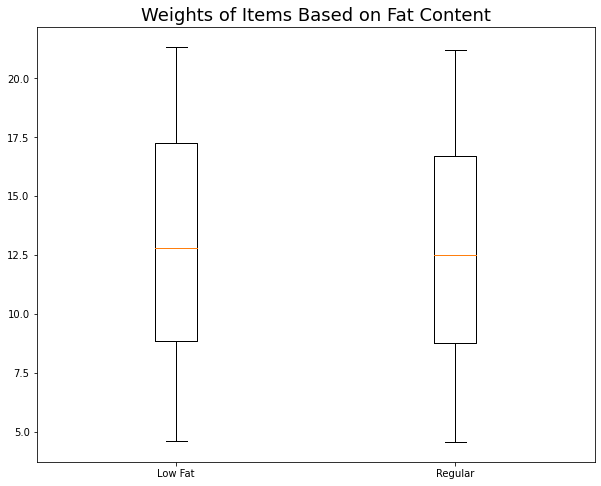

In [42]:
# Create array with weights of all low fat grocery items
low_fat_weight = sales_df.loc[sales_df['Item_Fat_Content'] == 'Low Fat', 'Item_Weight'].values;
# Create array with weights of all regular fat grocery items
regular_weight = sales_df.loc[sales_df['Item_Fat_Content'] == 'Regular', 'Item_Weight'].values;

# Display boxplots of weights based on fat content
plt.figure(figsize = (10,8))
plt.boxplot([low_fat_weight, regular_weight], labels = ['Low Fat', 'Regular']);
plt.title('Weights of Items Based on Fat Content', fontsize = 18);

> There is no difference in the distribution of weight for items based on their fat content. Low fat and regular fat items are all comparable in item weight.

#### Item outlet sales based on fat content

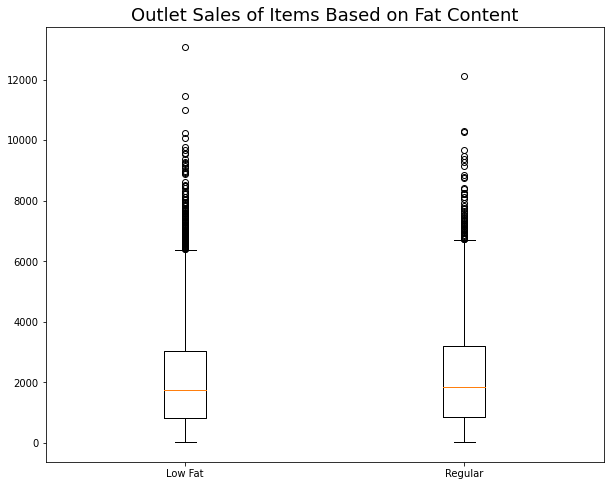

In [43]:
# Create array with sales of all low fat grocery items
low_fat_sales = sales_df.loc[sales_df['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales'].values;
# Create array with sales of all regular fat grocery items
regular_sales = sales_df.loc[sales_df['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales'].values;

# Display boxplots of weights based on fat content
plt.figure(figsize = (10,8))
plt.boxplot([low_fat_sales, regular_sales], labels = ['Low Fat', 'Regular']);
plt.title('Outlet Sales of Items Based on Fat Content', fontsize = 18);

> The low fat and regular fat items have approximately the same distribution for sales. The regular fat has slightly more maximum sales and less outliers, however the median sales are comparable.

#### Item outlet sales based on outlet size

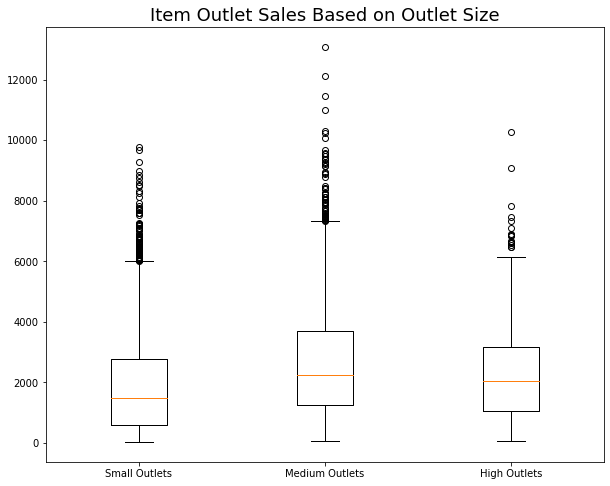

In [44]:
# Create array with sales of all small outlets
small_outlet_sales = sales_df.loc[sales_df['Outlet_Size'] == 'Small', 'Item_Outlet_Sales'].values;
# Create array with sales of all medium outlets
medium_outlet_sales = sales_df.loc[sales_df['Outlet_Size'] == 'Medium', 'Item_Outlet_Sales'].values;
# Create array with sales of all high outlets
high_outlet_sales = sales_df.loc[sales_df['Outlet_Size'] == 'High', 'Item_Outlet_Sales'].values;

# Display boxplots of weights based on fat content
plt.figure(figsize = (10,8))
plt.boxplot([small_outlet_sales, medium_outlet_sales, high_outlet_sales], labels = ['Small Outlets','Medium Outlets','High Outlets']);
plt.title('Item Outlet Sales Based on Outlet Size', fontsize = 18);

> Medium sized outlets have the highest maximum and outlier sales out of the three sizes. Though, the medium and high volume outlets have around the same median sales. The small outlets are close to the sales of the medium and high, however they still have less sales overall. 

#### Item outlet salse based on Outlet Type

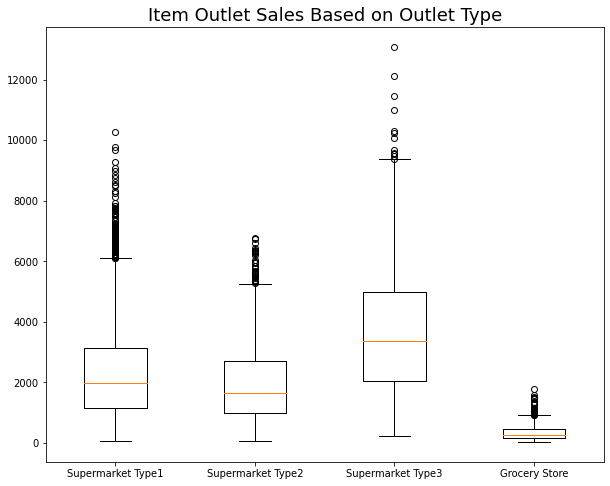

In [45]:
# Create array with sales of supermarket type1 outlets
sm1_sales = sales_df.loc[sales_df['Outlet_Type'] == 'Supermarket Type1', 'Item_Outlet_Sales'].values;
# Create array with sales of supermarket type2 outlets
sm2_sales = sales_df.loc[sales_df['Outlet_Type'] == 'Supermarket Type2', 'Item_Outlet_Sales'].values;
# Create array with sales of supermarket type3 outlets
sm3_sales = sales_df.loc[sales_df['Outlet_Type'] == 'Supermarket Type3', 'Item_Outlet_Sales'].values;
# Create array with sales of grocery store outlets
grocery_sales = sales_df.loc[sales_df['Outlet_Type'] == 'Grocery Store', 'Item_Outlet_Sales'].values;

# Display boxplots of weights based on fat content
plt.figure(figsize = (10,8))
plt.boxplot([sm1_sales, sm2_sales, sm3_sales, grocery_sales], labels = ['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store']);
plt.title('Item Outlet Sales Based on Outlet Type', fontsize = 18);

> All sizes of supermarkes have approximately the same distribution for Item Outlet Sales. The Suprmarket Type 3 is slightly higher than the Type1 and Type2, but they are still fairly similar. The Grocery Store outlets however, have significantly smaller Outlet Sales, and a smaller distribution of those sales. 

### Heatmap of correlation between features

In [46]:
# Calculate correlation coefficients for dataframe
corr = sales_df.corr()

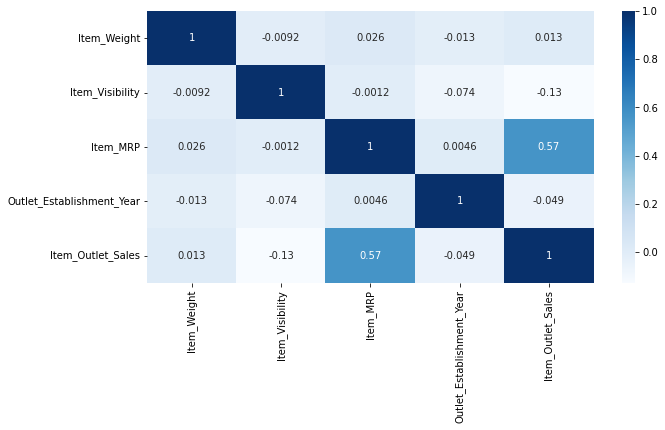

In [47]:
# Produce a Heatmap with correlation coefficients displayed for dataset
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap = 'Blues', annot = True);

> There is a moderate correlation of 0.57 between Item MRP and the Item Outlet Sales. There is no correlation between any other datapoints in this dataset, as all other correlation values are significantly less than 0.3. 

## Explanatory Visuals

### How does the average item MRP vary depending on the type of Item it is?

In [48]:
mrp_mean = sales_df.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)

In [54]:
mrp_mean.head(3)

Item_Type
Household        149.424753
Dairy            148.586649
Starchy Foods    147.838023
Name: Item_MRP, dtype: float64

In [53]:
mrp_mean.tail(3)

Item_Type
Soft Drinks           131.492506
Health and Hygiene    130.818921
Baking Goods          126.388758
Name: Item_MRP, dtype: float64

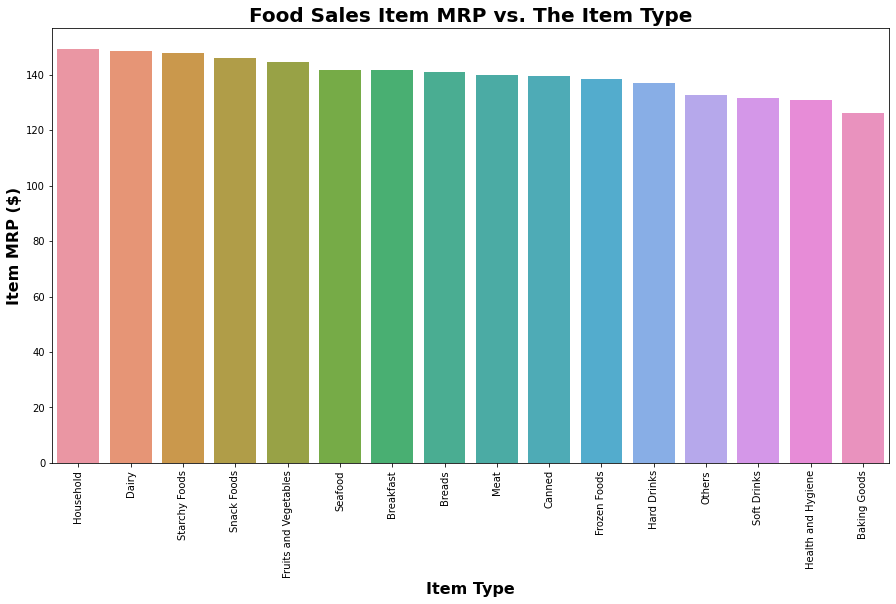

In [52]:
fig, ax = plt.subplots(figsize = (15,8))

ax = sns.barplot(data = sales_df, x='Item_Type', y='Item_MRP', order = mrp_mean.index, ci=None);
plt.xticks(rotation=90);
ax.set_title('Food Sales Item MRP vs. The Item Type', fontsize = 20, fontweight = 'bold');
ax.set_ylabel('Item MRP ($)', fontsize = 16, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 16, fontweight = 'bold');

- The Items with the highest MRPs are of the type
  - Household: $149.42

  - Dairy: $148.59

  - Starchy Foods: $147.84

- The items with the lowest MRPs are of the type
  - Baking Goods: $126.39

  - Health and Hygiene: $130.82

  - Soft Drinks: $131.49

### How does the average item visibility vary depending on the type of Item it is?

In [55]:
vis_mean = sales_df.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False)

In [56]:
vis_mean.head(3)

Item_Type
Breakfast    0.085723
Seafood      0.074976
Dairy        0.072490
Name: Item_Visibility, dtype: float64

In [57]:
vis_mean.tail(3)

Item_Type
Household             0.061322
Others                0.060241
Health and Hygiene    0.055216
Name: Item_Visibility, dtype: float64

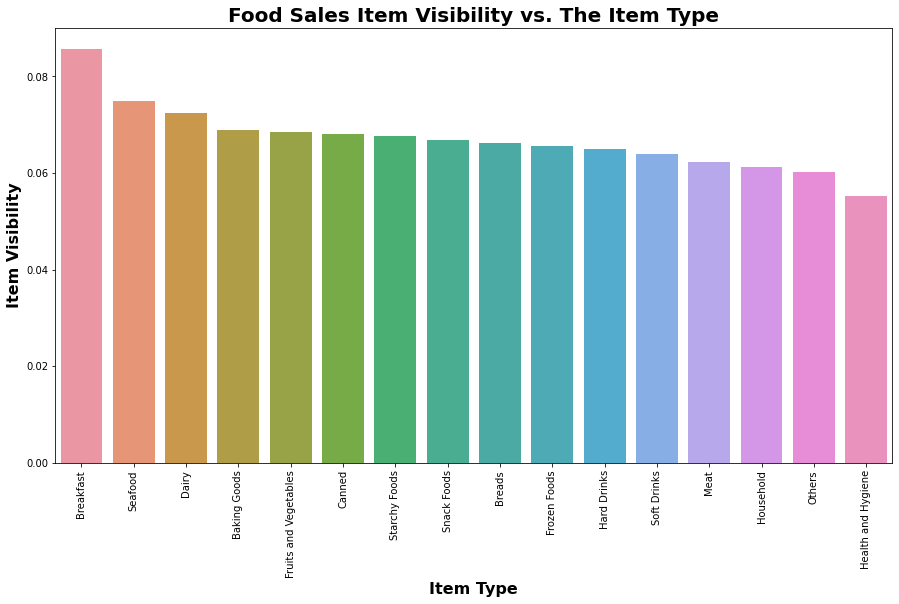

In [59]:
fig, ax = plt.subplots(figsize = (15,8))

ax = sns.barplot(data = sales_df, x='Item_Type', y='Item_Visibility', order = vis_mean.index, ci=None);
plt.xticks(rotation=90);
ax.set_title('Food Sales Item Visibility vs. The Item Type', fontsize = 20, fontweight = 'bold');
ax.set_ylabel('Item Visibility', fontsize = 16, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 16, fontweight = 'bold');

- The Items with the highest visibility are of the type
  - Breakfast: 0.085723
  - Seafood: 0.074976
  - Dairy: 0.072490

- The items with the lowest MRPs are of the type
  - Health and Hygiene: 0.055216
  - Others: 0.060241
  - Household: 0.061322